In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

100%|██████████| 13.4k/13.4k [00:00<00:00, 4.90MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


In [14]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("awaiskaggler/insurance-csv")
file_path = os.path.join(path, 'insurance.csv')

print("Path to dataset files:", file_path)
df = pd.read_csv(file_path)

df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1/insurance.csv


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Print columns to verify their names
print(df.columns)

# Assuming you find the columns are named 'Sex', 'Smoker', and 'Region'
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])



Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Vectors
age_vector = df['age'].values
bmi_vector = df['bmi'].values


print("Age Vector:", age_vector)
print("BMI Vector:", bmi_vector)

Age Vector: [19 18 28 ... 18 21 61]
BMI Vector: [27.9 33.8 33.  ... 36.9 25.8 29.1]


In [24]:

# Factors (using Label Encoding)
le = LabelEncoder()
sex_factor = le.fit_transform(df['sex'])
smoker_factor = le.fit_transform(df['smoker'])
region_factor = le.fit_transform(df['region'])
print("Sex Factor:", sex_factor)
print("Smoker Factor:", smoker_factor)
print("Region Factor:", region_factor)

Sex Factor: [0 1 1 ... 0 0 0]
Smoker Factor: [1 0 0 ... 0 0 1]
Region Factor: [3 2 2 ... 2 3 1]


In [30]:
# Create the list
insurance_data = {
  'Age': age_vector,
  'Sex': sex_factor,
  'BMI': bmi_vector,
  'Children': df['children'].values,
  'Smoker': smoker_factor,
  'Region': region_factor,
  'Expenses': df['expenses'].values  # Corrected column name to 'charges' if it was misspelled.
                   }

print(pd.DataFrame([insurance_data]))

                                                 Age  \
0  [19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 6...   

                                                 Sex  \
0  [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, ...   

                                                 BMI  \
0  [27.9, 33.8, 33.0, 22.7, 28.9, 25.7, 33.4, 27....   

                                            Children  \
0  [0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, ...   

                                              Smoker  \
0  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...   

                                              Region  \
0  [3, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 3, 2, 2, ...   

                                            Expenses  
0  [16884.92, 1725.55, 4449.46, 21984.47, 3866.86...  


In [33]:
expenses_list = df['expenses'].tolist()  # List of charges
children_list = df['children'].tolist()  # List of children

print("expenses List:", expenses_list)
print("Children List:", children_list)

expenses List: [16884.92, 1725.55, 4449.46, 21984.47, 3866.86, 3756.62, 8240.59, 7281.51, 6406.41, 28923.14, 2721.32, 27808.73, 1826.84, 11090.72, 39611.76, 1837.24, 10797.34, 2395.17, 10602.39, 36837.47, 13228.85, 4149.74, 1137.01, 37701.88, 6203.9, 14001.13, 14451.84, 12268.63, 2775.19, 38711.0, 35585.58, 2198.19, 4687.8, 13770.1, 51194.56, 1625.43, 15612.19, 2302.3, 39774.28, 48173.36, 3046.06, 4949.76, 6272.48, 6313.76, 6079.67, 20630.28, 3393.36, 3556.92, 12629.9, 38709.18, 2211.13, 3579.83, 23568.27, 37742.58, 8059.68, 47496.49, 13607.37, 34303.17, 23244.79, 5989.52, 8606.22, 4504.66, 30166.62, 4133.64, 14711.74, 1743.21, 14235.07, 6389.38, 5920.1, 17663.14, 16577.78, 6799.46, 11741.73, 11946.63, 7726.85, 11356.66, 3947.41, 1532.47, 2755.02, 6571.02, 4441.21, 7935.29, 37165.16, 11033.66, 39836.52, 21098.55, 43578.94, 11073.18, 8026.67, 11082.58, 2026.97, 10942.13, 30184.94, 5729.01, 47291.06, 3766.88, 12105.32, 10226.28, 22412.65, 15820.7, 6186.13, 3645.09, 21344.85, 30942.19, 50

In [31]:

# Matrix (combining numeric features)
numeric_features = df[['age', 'bmi', 'children']].values

print("Numeric Features Matrix:\n", numeric_features)

Numeric Features Matrix:
 [[19.  27.9  0. ]
 [18.  33.8  1. ]
 [28.  33.   3. ]
 ...
 [18.  36.9  0. ]
 [21.  25.8  0. ]
 [61.  29.1  0. ]]


In [34]:



# Data Frame (subset of original data)
subset_df = df[['age', 'bmi', 'sex', 'smoker', 'region', 'expenses']]  # Data frame with selected columns

print("Subset Data Frame:\n", subset_df)

Subset Data Frame:
       age   bmi  sex  smoker  region  expenses
0      19  27.9    0       1       3  16884.92
1      18  33.8    1       0       2   1725.55
2      28  33.0    1       0       2   4449.46
3      33  22.7    1       0       1  21984.47
4      32  28.9    1       0       1   3866.86
...   ...   ...  ...     ...     ...       ...
1333   50  31.0    1       0       1  10600.55
1334   18  31.9    0       0       0   2205.98
1335   18  36.9    0       0       2   1629.83
1336   21  25.8    0       0       3   2007.95
1337   61  29.1    0       1       1  29141.36

[1338 rows x 6 columns]


In [ ]:
# Generate a scatter plot.
# Customize it by adding a title, axis labels, text annotations,
#and changing the plot characters (e.g., circles to plus signs).


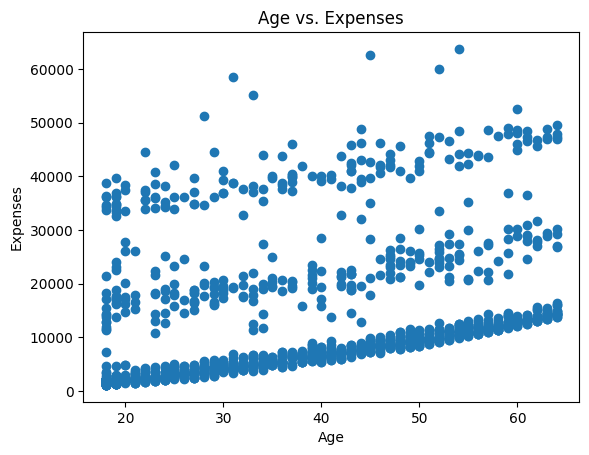

In [35]:
#generate a scatter plot for age and expenses
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['expenses'])
plt.title('Age vs. Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()

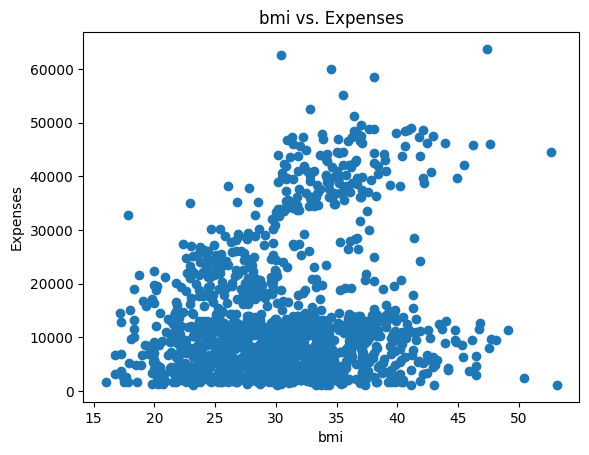

In [36]:
#scatter plot for bmo and expenses
plt.scatter(df['bmi'], df['expenses'])
plt.title('bmi vs. Expenses')
plt.xlabel('bmi')
plt.ylabel('Expenses')
plt.show()

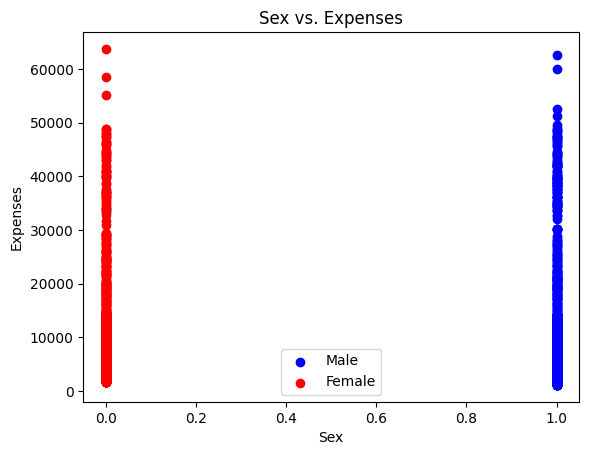

In [38]:
import matplotlib.pyplot as plt

# Separate data for males (sex = 1) and females (sex = 0)
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

# Create scatter plots with different colors
plt.scatter(male_data['sex'], male_data['expenses'], label='Male', color='blue')
plt.scatter(female_data['sex'], female_data['expenses'], label='Female', color='red')

# Add title, labels, and legend
plt.title('Sex vs. Expenses')
plt.xlabel('Sex')
plt.ylabel('Expenses')
plt.legend()

plt.show()

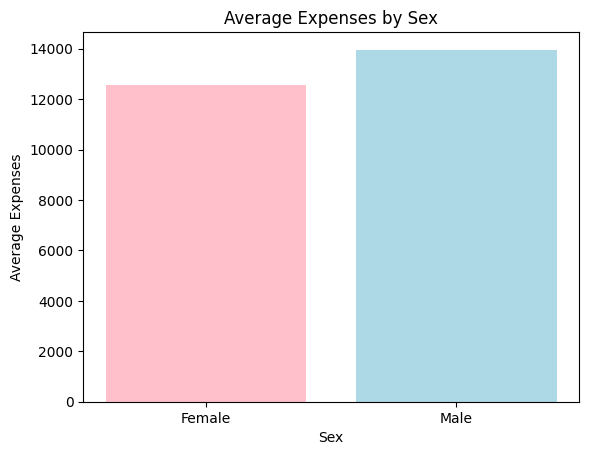

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average expenses for males and females
avg_expenses_male = df[df['sex'] == 1]['expenses'].mean()
avg_expenses_female = df[df['sex'] == 0]['expenses'].mean()

# Create bar chart
sex_labels = ['Female', 'Male']  # Corresponding to 0 and 1 in 'sex' column
avg_expenses = [avg_expenses_female, avg_expenses_male]

plt.bar(sex_labels, avg_expenses, color=['pink', 'lightblue'])  # Customize colors

plt.title('Average Expenses by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Expenses')

plt.show()

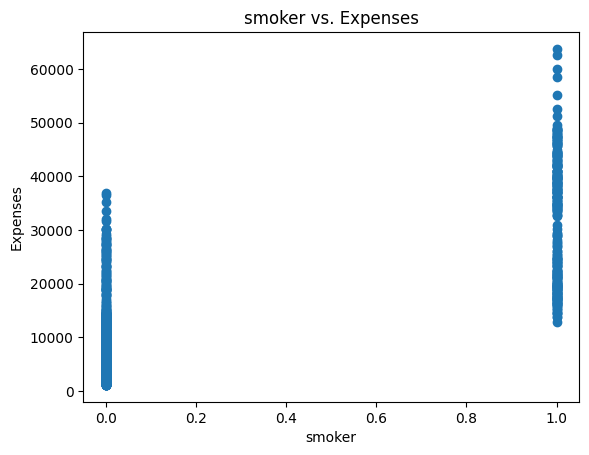

In [43]:
#scatter plot for smoker and expenses
plt.scatter(df['smoker'], df['expenses'])
plt.title('smoker vs. Expenses')
plt.xlabel('smoker')
plt.ylabel('Expenses')
plt.show()

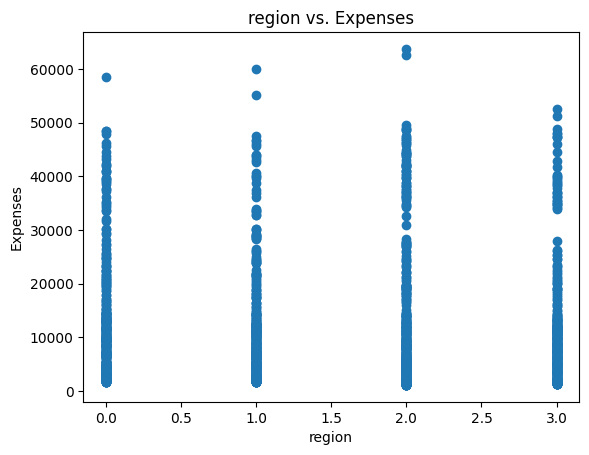

In [44]:
#scatter plot for smoker and expenses
plt.scatter(df['region'], df['expenses'])
plt.title('region vs. Expenses')
plt.xlabel('region')
plt.ylabel('Expenses')
plt.show()

In [46]:
#calculate how many tennage age<=20 smokers are present
teenage_smokers_count = df[(df['age'] < 20) & (df['smoker'] == 1)].shape[0]

print("Number of teenage smokers:", teenage_smokers_count)


Number of teenage smokers: 30


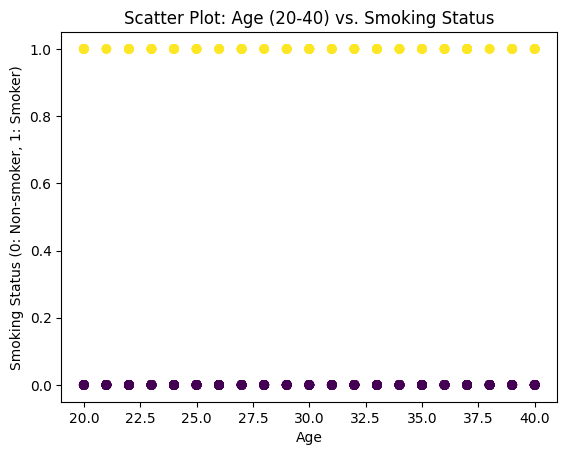

In [47]:
import matplotlib.pyplot as plt

# Filter data for ages between 20 and 40
filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40)]

# Create scatter plot
plt.scatter(filtered_df['age'], filtered_df['smoker'],
            c=filtered_df['smoker'], cmap='viridis')  # Color points by smoking status

# Customize the plot
plt.title('Scatter Plot: Age (20-40) vs. Smoking Status')
plt.xlabel('Age')
plt.ylabel('Smoking Status (0: Non-smoker, 1: Smoker)')

# Show the plot
plt.show()

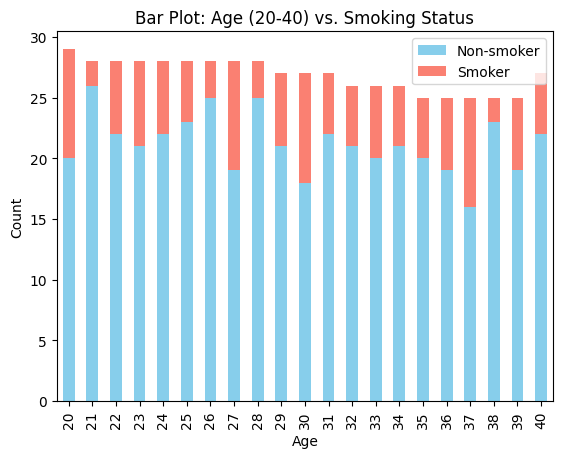

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for ages between 20 and 40
filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40)]

# Group data by age and smoking status and count occurrences
age_smoking_counts = filtered_df.groupby(['age', 'smoker'])['smoker'].count().unstack()

# Create bar plot
age_smoking_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Customize the plot
plt.title('Bar Plot: Age (20-40) vs. Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Non-smoker', 'Smoker'])

# Show the plot
plt.show()



Average expenses for smokers: 32050.23197080292
Average expenses for non-smokers: 8434.268449248118


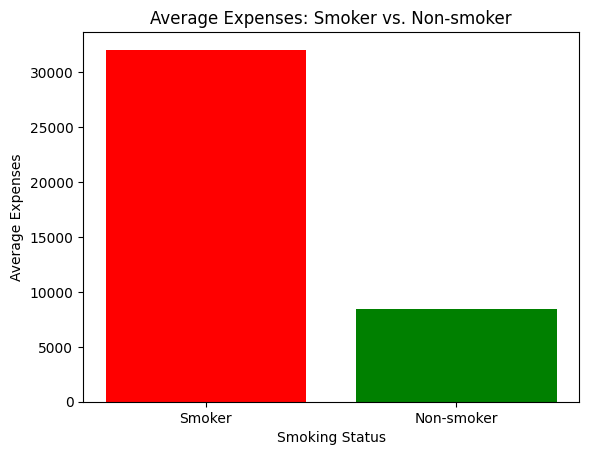

In [51]:
#find expenses of smoker and non-smoker
smoker_expenses = df[df['smoker'] == 1]['expenses'].mean()
non_smoker_expenses = df[df['smoker'] == 0]['expenses'].mean()

print("Average expenses for smokers:", smoker_expenses)
print("Average expenses for non-smokers:", non_smoker_expenses)

# Create bar chart
labels = ['Smoker', 'Non-smoker']
expenses = [smoker_expenses, non_smoker_expenses]

plt.bar(labels, expenses, color=['red', 'green'])

plt.title('Average Expenses: Smoker vs. Non-smoker')
plt.xlabel('Smoking Status')
plt.ylabel('Average Expenses')

plt.show()

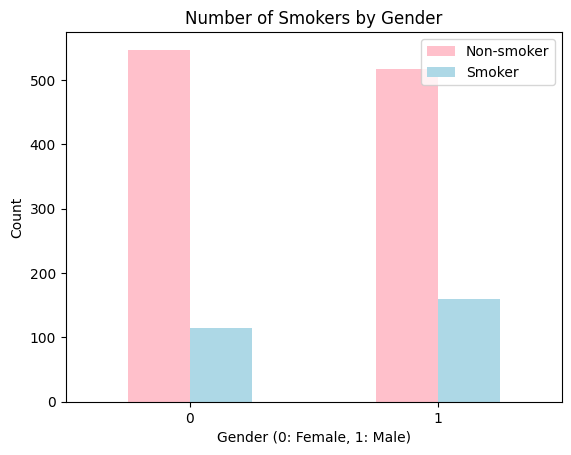

In [52]:

import matplotlib.pyplot as plt
import pandas as pd

# Group data by sex and smoker and count occurrences
smoker_gender_counts = df.groupby(['sex', 'smoker'])['smoker'].count().unstack()

# Create bar plot
smoker_gender_counts.plot(kind='bar', stacked=False, color=['pink', 'lightblue'])  # Use stacked=False for side-by-side bars

# Customize the plot
plt.title('Number of Smokers by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['Non-smoker', 'Smoker'])
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()